In [1]:
from pymongo import MongoClient
import pandas as pd

In [2]:
import datetime

In [3]:
import matplotlib.pyplot as mplt

In [8]:
mongo_client = MongoClient('18.229.198.24' , 27017)
mongo_db = mongo_client['inatel']
mongo_collection = mongo_db['sensor']

In [9]:
dados = list(mongo_collection.find())
df = pd.DataFrame(dados)

In [10]:
df.head()

,_id,temperatura,data_coleta
0,5dc06088190459ef9dc0901b,18.190053,2019-11-04 15:31:52.843
1,5dc06089190459ef9dc0901c,22.905443,2019-11-04 15:31:53.847
2,5dc0608a190459ef9dc0901d,25.235211,2019-11-04 15:31:54.842
3,5dc0608b190459ef9dc0901e,25.856287,2019-11-04 15:31:55.857
4,5dc0608c190459ef9dc0901f,17.107138,2019-11-04 15:31:56.850


In [11]:
df.count()

_id            7844
temperatura    7844
data_coleta    7844
dtype: int64

In [12]:
df['temperatura'].mean()

22.404096946811183

In [13]:
df['temperatura'].max()

29.998977442634605

In [14]:
df['temperatura'].min()

15.001176162191515

In [19]:
def check_temperatura(temperatura):
    if temperatura < 19:
        return 'Frio'
    if temperatura <= 28:
        return 'Normal'
    return 'Quente'

In [20]:
df['alarm'] = df['temperatura'].apply(check_temperatura)

In [21]:
df.head()

,_id,temperatura,data_coleta,alarm
0,5dc06088190459ef9dc0901b,18.190053,2019-11-04 15:31:52.843,Frio
1,5dc06089190459ef9dc0901c,22.905443,2019-11-04 15:31:53.847,Normal
2,5dc0608a190459ef9dc0901d,25.235211,2019-11-04 15:31:54.842,Normal
3,5dc0608b190459ef9dc0901e,25.856287,2019-11-04 15:31:55.857,Normal
4,5dc0608c190459ef9dc0901f,17.107138,2019-11-04 15:31:56.850,Frio


In [22]:
df.groupby(['alarm']).count()

,_id,temperatura,data_coleta
alarm,,,
Frio,2122,2122,2122
Normal,4731,4731,4731
Quente,991,991,991


In [23]:
df['alarm'].value_counts()

Normal    4731
Frio      2122
Quente     991
Name: alarm, dtype: int64

In [24]:
media_min = df.set_index('data_coleta').resample('min')['temperatura'].mean()

In [25]:
media_min.head()

data_coleta
2019-11-04 15:31:00    23.479586
2019-11-04 15:32:00    22.840196
2019-11-04 15:33:00    22.426834
2019-11-04 15:34:00    23.360674
2019-11-04 15:35:00    22.134071
Freq: T, Name: temperatura, dtype: float64

In [36]:
df_20191104 = df[(df['data_coleta'] > '2019-11-04 16:00:00') & (df['data_coleta'] < '2019-11-04 17:00:00')]

In [37]:
df_20191104.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3592 entries, 1683 to 5274
Data columns (total 4 columns):
_id            3592 non-null object
temperatura    3592 non-null float64
data_coleta    3592 non-null datetime64[ns]
alarm          3592 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 140.3+ KB


In [38]:
df_20191104['temperatura'].agg(['min','max','mean'])

min     15.006126
max     29.997160
mean    22.327971
Name: temperatura, dtype: float64

In [39]:
df_20191104['temperatura'].describe()

count    3592.000000
mean       22.327971
std         4.340724
min        15.006126
25%        18.571939
50%        22.246742
75%        26.102424
max        29.997160
Name: temperatura, dtype: float64

In [57]:
df_20191104['alarm'].value_counts()

Normal    2141
Frio      1007
Quente     444
Name: alarm, dtype: int64

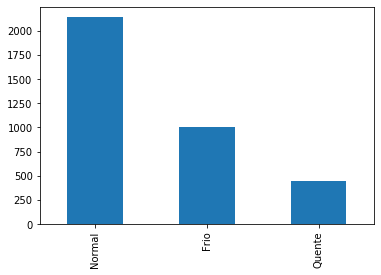

In [59]:
df_20191104['alarm'].value_counts().plot.bar()

In [60]:
df_20191104.drop('_id', axis=1, inplace=True)

KeyError: "['_id'] not found in axis"

In [61]:
df_20191104.head()

,temperatura,data_coleta,alarm
1683,16.062296,2019-11-04 16:00:00.076,Frio
1684,21.234620,2019-11-04 16:00:01.063,Normal
1685,15.939795,2019-11-04 16:00:02.063,Frio
1686,15.975801,2019-11-04 16:00:03.074,Frio
1687,17.253927,2019-11-04 16:00:04.081,Frio


In [62]:
media_min = df_20191104.set_index('data_coleta').resample('min')['temperatura'].mean()

In [63]:
media_min

data_coleta
2019-11-04 16:00:00    22.028676
2019-11-04 16:01:00    22.780485
2019-11-04 16:02:00    22.251009
2019-11-04 16:03:00    22.627084
2019-11-04 16:04:00    22.640043
2019-11-04 16:05:00    22.099567
2019-11-04 16:06:00    21.860714
2019-11-04 16:07:00    22.556591
2019-11-04 16:08:00    22.983563
2019-11-04 16:09:00    21.736381
2019-11-04 16:10:00    23.098284
2019-11-04 16:11:00    22.541319
2019-11-04 16:12:00    23.715896
2019-11-04 16:13:00    22.142370
2019-11-04 16:14:00    22.376399
2019-11-04 16:15:00    21.466887
2019-11-04 16:16:00    22.153806
2019-11-04 16:17:00    23.125890
2019-11-04 16:18:00    22.441928
2019-11-04 16:19:00    22.502582
2019-11-04 16:20:00    23.464653
2019-11-04 16:21:00    22.132798
2019-11-04 16:22:00    22.889797
2019-11-04 16:23:00    22.619929
2019-11-04 16:24:00    21.899878
2019-11-04 16:25:00    21.432511
2019-11-04 16:26:00    22.805887
2019-11-04 16:27:00    22.131164
2019-11-04 16:28:00    22.181804
2019-11-04 16:29:00    22.01350

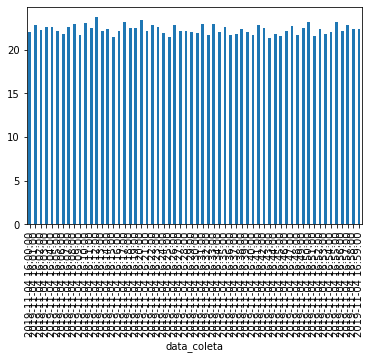

In [64]:
media_min.plot.bar()

In [73]:
df_20191104.loc[df_20191104['temperatura'].idxmax()]

temperatura                       29.9972
data_coleta    2019-11-04 16:23:05.541000
alarm                              Quente
Name: 3065, dtype: object

In [74]:
df_20191104.loc[df_20191104['temperatura'].idxmin()]

temperatura                       15.0061
data_coleta    2019-11-04 16:27:50.252000
alarm                                Frio
Name: 3349, dtype: object

In [75]:
df_20191104['Alerta'] = df['temperatura'].apply(lambda x: True if x >= 28 else False )

/home/aluno/Projeto in242/env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
df_20191104

,temperatura,data_coleta,alarm,Alerta
1683,16.062296,2019-11-04 16:00:00.076,Frio,False
1684,21.234620,2019-11-04 16:00:01.063,Normal,False
1685,15.939795,2019-11-04 16:00:02.063,Frio,False
1686,15.975801,2019-11-04 16:00:03.074,Frio,False
1687,17.253927,2019-11-04 16:00:04.081,Frio,False
...,...,...,...,...
5270,28.730879,2019-11-04 16:59:55.844,Quente,True
5271,24.494320,2019-11-04 16:59:56.855,Normal,False
5272,24.351986,2019-11-04 16:59:57.847,Normal,False
5273,27.371419,2019-11-04 16:59:58.847,Normal,False


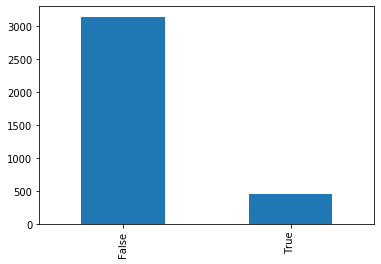

In [82]:
df_20191104['Alerta'].value_counts().plot.bar()

In [84]:
df.to_csv('in242.csv')